<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [5]:
%pip install seaborn

In [6]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [7]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [8]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [9]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [10]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [11]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   OpenSource              11317 non-null  object 
 5   Employment              11398 non-null  object 
 6   Country                 11398 non-null  object 
 7   Student                 11347 non-null  object 
 8   EdLevel                 11286 non-null  object 
 9   UndergradMajor          10661 non-null  object 
 10  EduOther                11234 non-null  object 
 11  OrgSize                 11302 non-null  object 
 12  DevType                 11333 non-null  object 
 13  YearsCode               11389 non-null  object 
 14  Age1stCode              11385 non-null

In [13]:
# your code goes here
import matplotlib.pyplot as plt
import numpy as np

Plot the histogram for the column `ConvertedComp`.


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

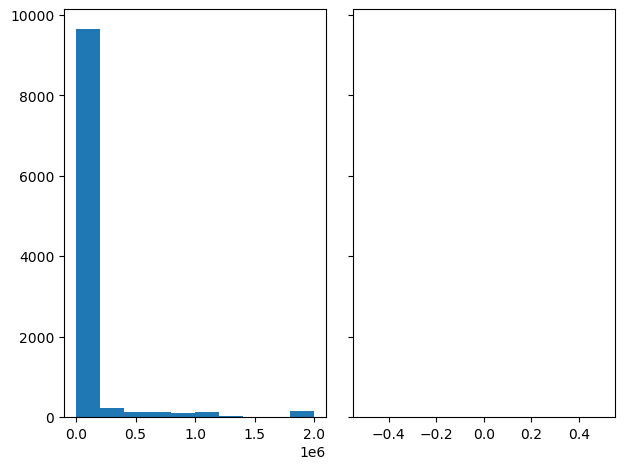

In [14]:
# your code goes here
max_comp=df["ConvertedComp"].max()
min_comp=df["ConvertedComp"].min()
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
curve=df["ConvertedComp"]
axs[0].hist(curve)
axs[1].hist(min_comp)

What is the median of the column `ConvertedComp`?


In [15]:
# your code goes here
df["ConvertedComp"].median()

57745.0

How many responders identified themselves only as a **Man**?


In [16]:
# your code goes here
df["Gender"].value_counts()


Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [17]:
# your code goes here
df_w = df[df["Gender"]=="Woman"]
df_w["Gender"].head()

30    Woman
32    Woman
38    Woman
45    Woman
68    Woman
Name: Gender, dtype: object

In [18]:
df_w["ConvertedComp"].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [19]:
# your code goes here
min_age=df["Age"].min()
max_age=df["Age"].max()
q1_age=df["Age"].quantile(0.25)
q3_age=df["Age"].quantile(0.75)
median_age=df["Age"].median()
print(min_age, q1_age, median_age, q3_age, max_age)

16.0 25.0 29.0 35.0 99.0


Plot a histogram of the column `Age`.


<AxesSubplot:xlabel='Age', ylabel='Count'>

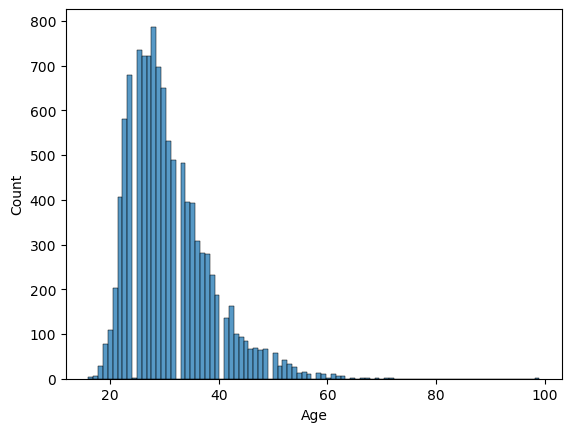

In [22]:
# your code goes here
import seaborn as sns
sns.histplot(x=df["Age"])

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


In [23]:
box=df["ConvertedComp"].array
type(box)

pandas.core.arrays.numpy_.NumpyExtensionArray

<AxesSubplot:ylabel='ConvertedComp'>

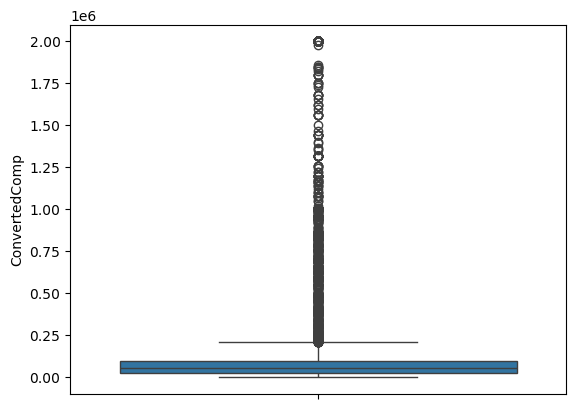

In [29]:
# your code goes here
import seaborn as sns
box=df["ConvertedComp"].array
min_Comp=df["ConvertedComp"].min()
max_Comp=df["ConvertedComp"].max()
q1_Comp=df["ConvertedComp"].quantile(0.25)
q3_Comp=df["ConvertedComp"].quantile(0.75)
median_Comp=df["ConvertedComp"].median()
stats={"med":median_Comp,"q1":q1_Comp,"q3":q3_Comp,"whislo":min_Comp,"whishi":max_Comp}
sns.boxplot(data=df,y=df["ConvertedComp"])



<AxesSubplot:ylabel='Age'>

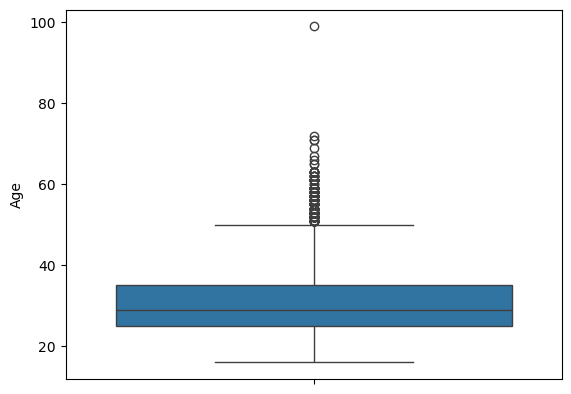

In [30]:
sns.boxplot(data=df,y=df["Age"])

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [28]:
# your code goes here
print(stats)
print(q3_Comp-q1_Comp)

{'med': 57745.0, 'q1': 26868.0, 'q3': 100000.0, 'whislo': 0.0, 'whishi': 2000000.0}
73132.0


Find out the upper and lower bounds.


In [87]:
# your code goes here
from scipy import stats
IQR= q3_Comp-q1_Comp
z = np.abs(stats.zscore(df["ConvertedComp"]))
threshold = 1.5
outliers = df[(df["ConvertedComp"] < q1_Comp - threshold * IQR) | (df["ConvertedComp"] > q3_Comp + threshold * IQR)]

Identify how many outliers are there in the `ConvertedComp` column.


In [88]:
# your code goes here


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [89]:
# your code goes here
df_c = df.drop(outliers.index)
df_c["ConvertedComp"].mean()

59883.20838915799

In [90]:
df_c["ConvertedComp"].median()

52704.0

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


<AxesSubplot:xlabel='Age', ylabel='CodeRevHrs'>

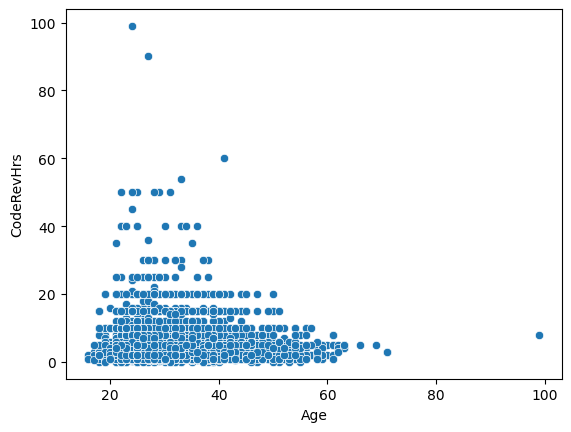

In [91]:
# your code goes here
sns.scatterplot(data=df_c,x="Age",y="CodeRevHrs")


<AxesSubplot:xlabel='Age', ylabel='CompTotal'>

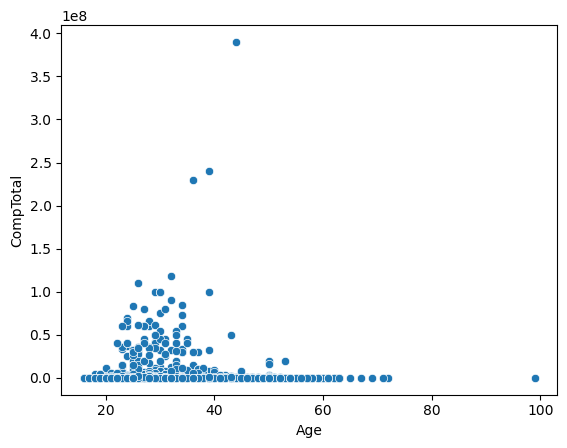

In [92]:
sns.scatterplot(data=df_c,x="Age",y="CompTotal")

<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

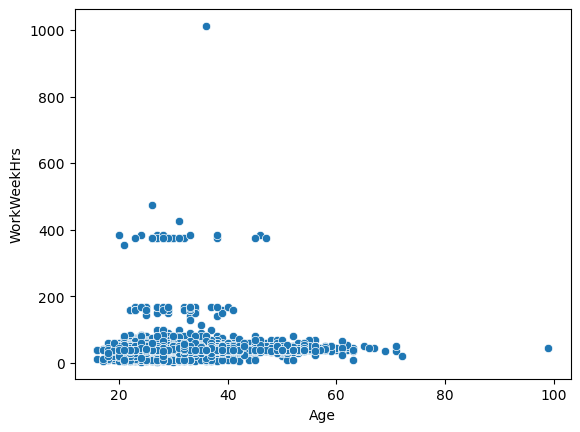

In [93]:
sns.scatterplot(data=df_c,x="Age",y="WorkWeekHrs")

<AxesSubplot:xlabel='Age', ylabel='Respondent'>

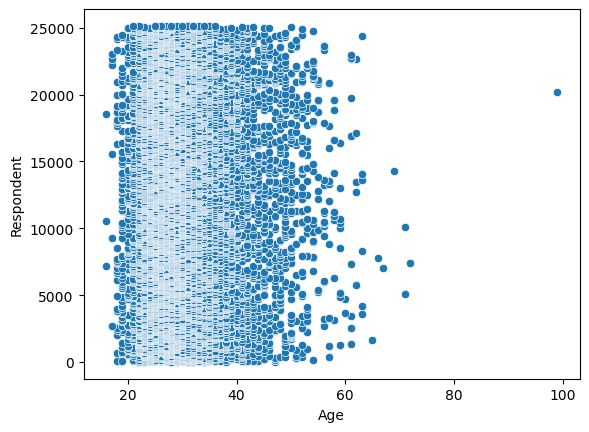

In [94]:
sns.scatterplot(data=df_c,x="Age",y="Respondent")

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
